
 QUICK INFO: Full Dataset
1.INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
******************************
2.DESCREPTION:
          count        mean         std   min   

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


END OF REPORT

  A: DATA QUALITY INSPECTION


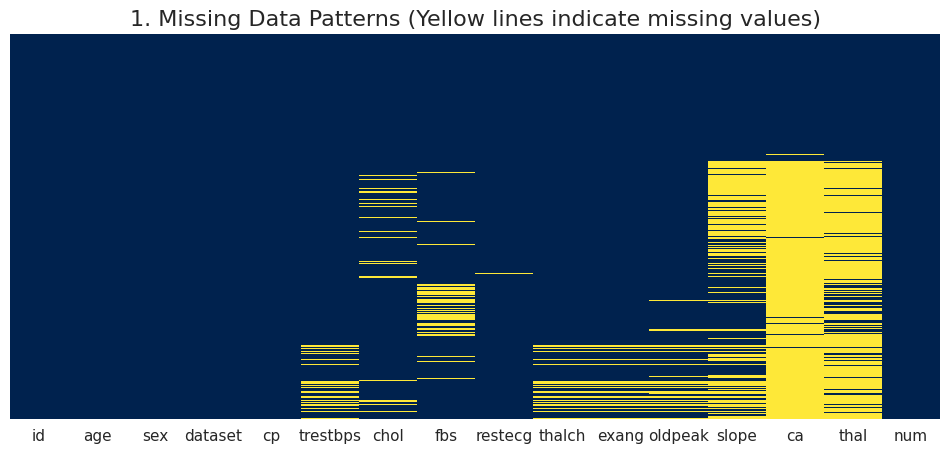

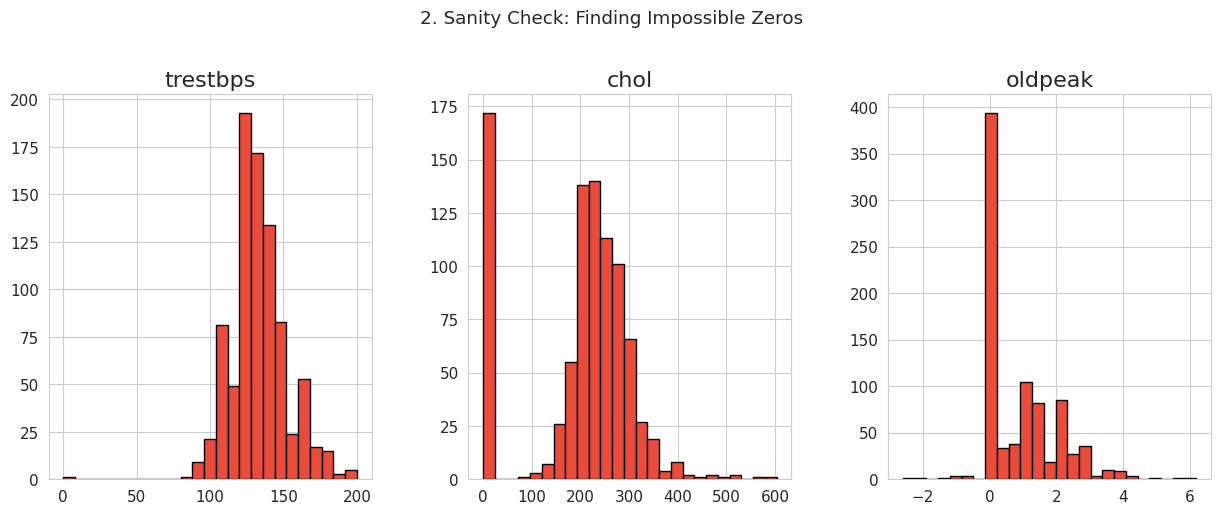


  B: RELATIONSHIP ANALYSIS (The Big Picture)


/tmp/ipython-input-3563756393.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='target_binary', data=df, palette='coolwarm', ax=ax[0], errorbar=None)
/tmp/ipython-input-3563756393.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='target_binary', data=df, palette='magma', ax=ax[1], errorbar=None)
/tmp/ipython-input-3563756393.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dataset', y='target_binary', data=df, palette='viridis', ax=ax[2], errorbar=None)


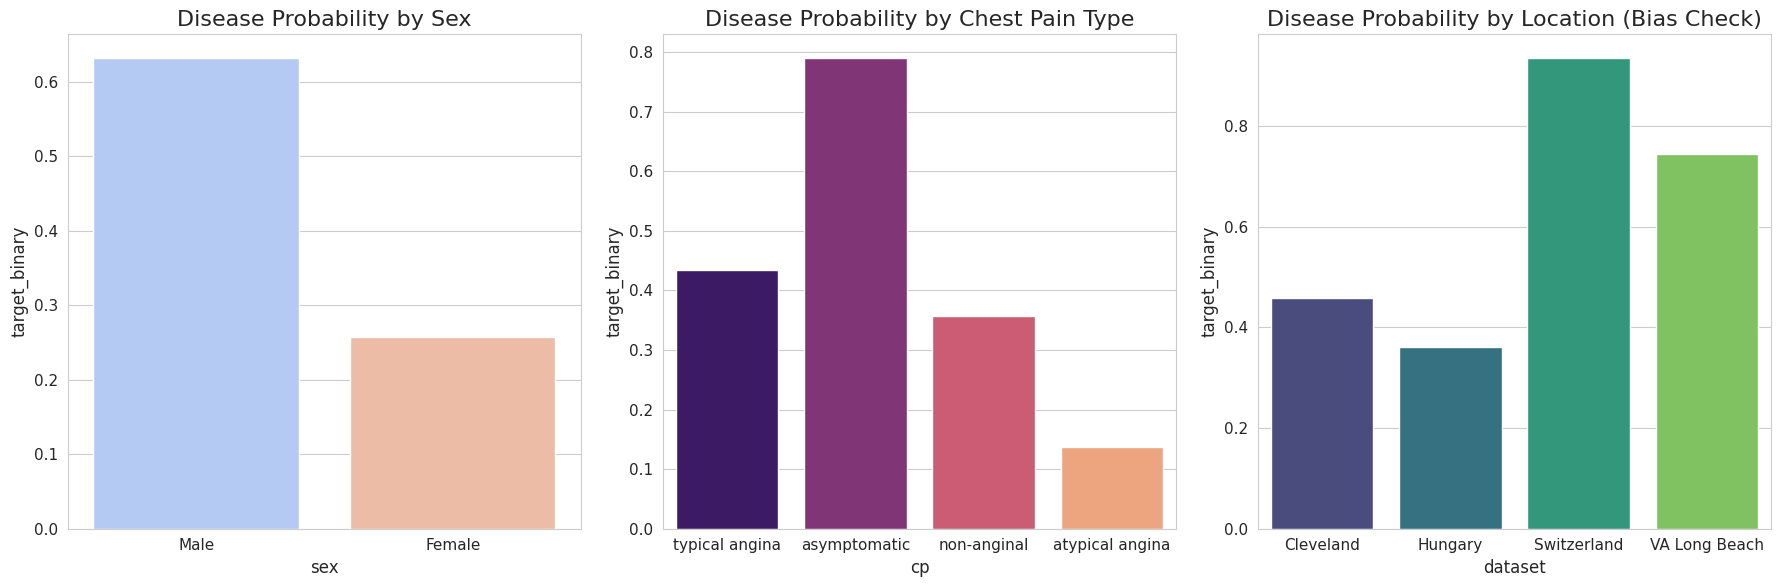

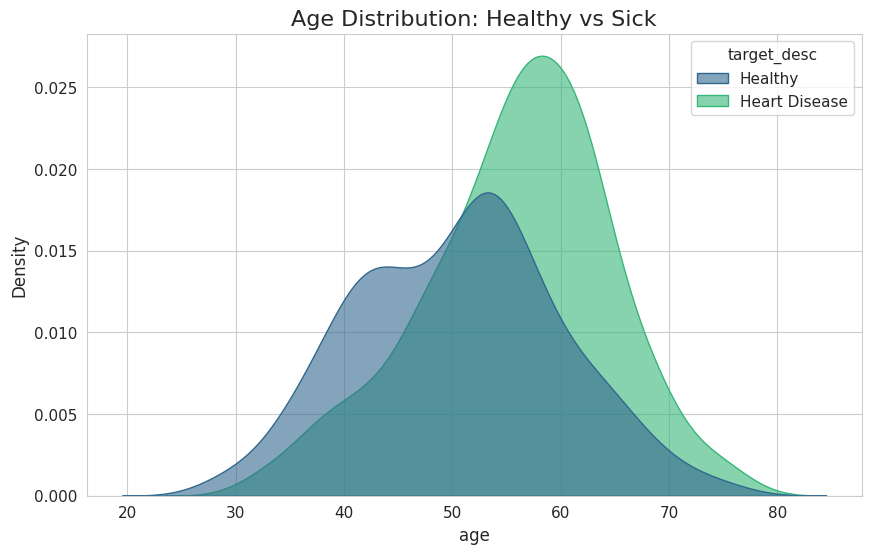

/tmp/ipython-input-3563756393.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_desc', y='chol', palette='Set2')


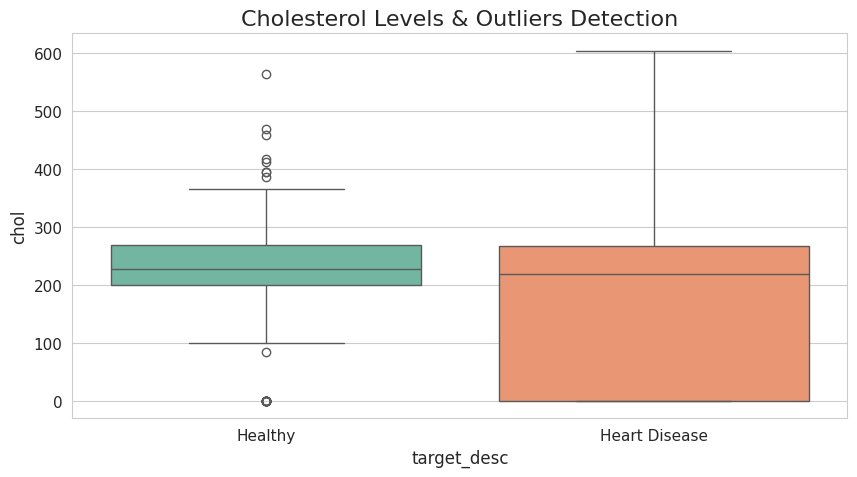


  C: ADVANCED STATISTICS


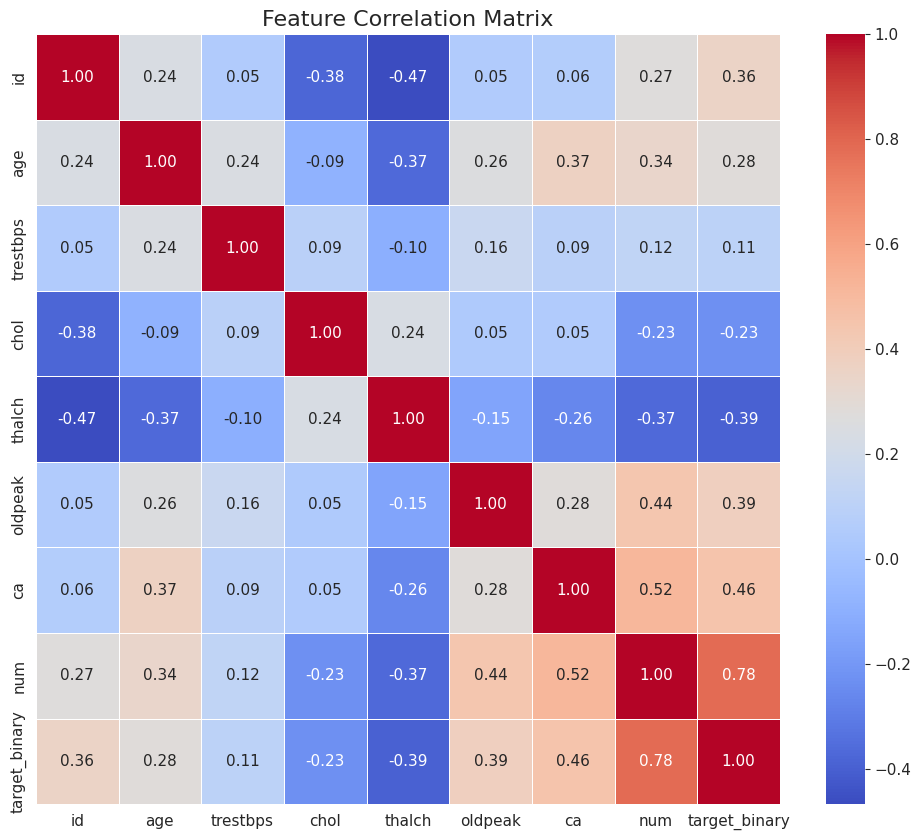

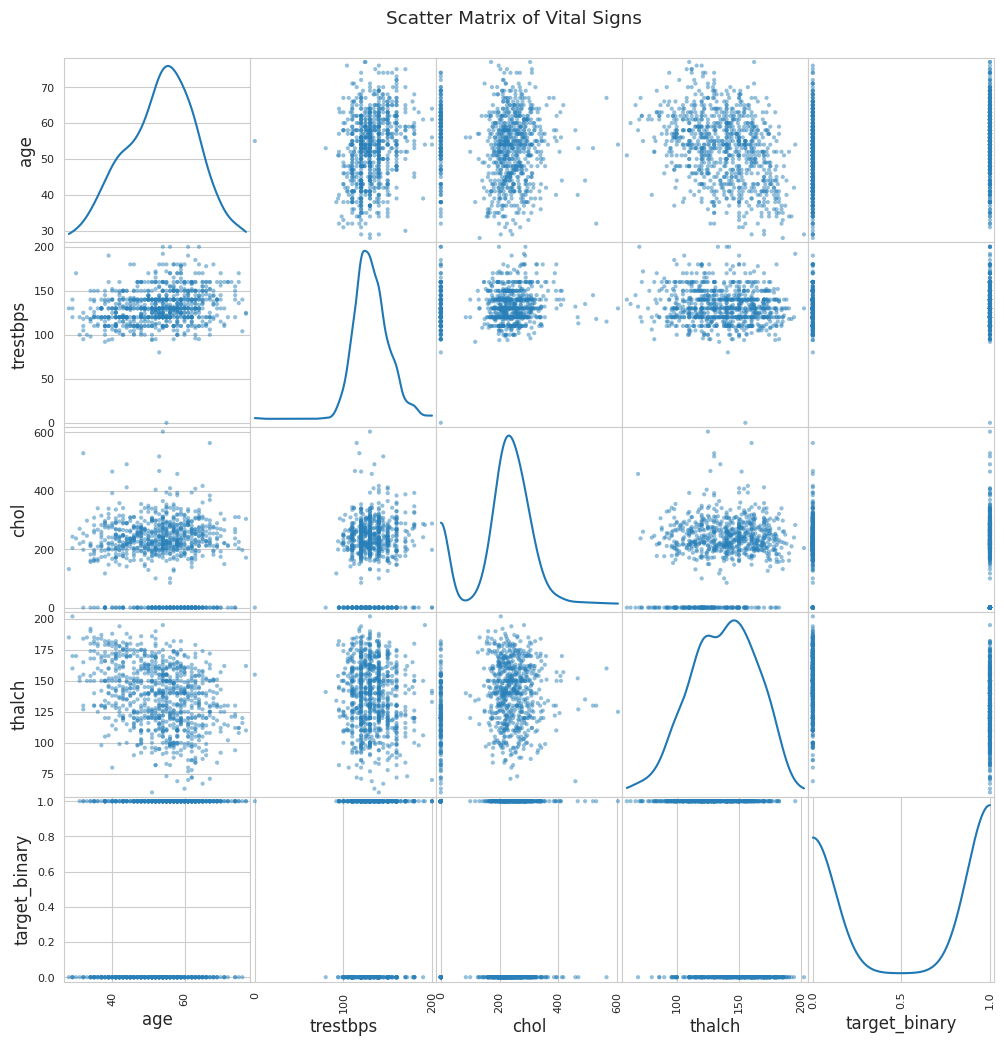


[Experiment Result]: Correlation Improvement?
target_binary     1.000000
thalch           -0.394503
thalch_per_age   -0.398136
Name: target_binary, dtype: float64


In [9]:

#==============================1.LIBRARIES & SETUP==============================
#*************************************A. LIB ***********************************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#*********************************B.LOOK****************************************
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['font.size'] = 11


#===========================2.FUN===============================================
#**********************A. QI(Quick info)****************************************
def Quick_info(df, df_name):
    print(f"\n{'='*50}\n QUICK INFO: {df_name}\n{'='*50}")
    print("1.INFO:")
    df.info()
    print("*" * 30)

    print("2.DESCREPTION:")
    print(df.describe().T)
    print("*" * 30)

    print(f"3. SHAPE: {df.shape}")
    print("*" * 30)

    print("4. MISSING VALUES (>0 Only):")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    print("*" * 30)

    print("5. DATA TYPES:")
    print(df.dtypes.value_counts())
    print("*" * 30)

    print("6.HEAD")
    display(df.head())

    print("="*30)
    print("END OF REPORT")
    print("="*30)
#******************************B.DRAW*******************************************
def plot_distribution(df, col, target, title):
    """رسم توزيع متغير رقمي مقارنة بالهدف (KDE Plot)"""
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=col, hue=target, fill=True, palette='viridis', alpha=0.6)
    plt.title(title)
    plt.xlabel(col)
    plt.show()

#============================3. DATA LOADING ===================================

try:
    df = pd.read_csv('heart_disease_uci.csv')

    Quick_info(df, "Full Dataset")

except FileNotFoundError:
    print("ERROR: 'heart_disease_uci.csv' not found. Please upload it.")


#==================4. DATA QUALITY & SANITY CHECKS==============================
if 'df' in locals():
    print("\n  A: DATA QUALITY INSPECTION")

#****************A. Missing Values Heatmap**************************************
    plt.figure(figsize=(12, 5))
    sns.heatmap(df.isnull(), cbar=False, cmap='cividis', yticklabels=False)
    plt.title('1. Missing Data Patterns (Yellow lines indicate missing values)')
    plt.show()

#****************B.Medical Impossibilities (Zeros in Vitals)********************
    # trestbps (Blood Pressure), chol (Cholesterol) cannot be 0 biologically.
    zero_cols = ['trestbps', 'chol', 'oldpeak']
    df[zero_cols].hist(bins=25, figsize=(15, 5), layout=(1, 3), color='#e74c3c', edgecolor='black')
    plt.suptitle('2. Sanity Check: Finding Impossible Zeros', y=1.05)
    plt.show()

#================5. DEEP DIVE ANALYSIS & VISUALIZATION==========================
    print("\n  B: RELATIONSHIP ANALYSIS (The Big Picture)")

    #****A.Prepare Target for Visualization (Binary: 0=Healthy, 1=Sick)*********
    df['target_binary'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df['target_desc'] = df['target_binary'].map({0: 'Healthy', 1: 'Heart Disease'})

    #**********B. Categorical Insights (Bar Plots)******************************
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    #~~~~~~~~~~~~~~~~~~~~~~Sex vs Disease~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    sns.barplot(x='sex', y='target_binary', data=df, palette='coolwarm', ax=ax[0], errorbar=None)
    ax[0].set_title('Disease Probability by Sex')

    #~~~~~~~~~~~~~~~~~~~~~~~~~~CP vs Disease~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    sns.barplot(x='cp', y='target_binary', data=df, palette='magma', ax=ax[1], errorbar=None)
    ax[1].set_title('Disease Probability by Chest Pain Type')

    #~~~~~~~~~~~~~~Dataset (Location) vs Disease - Checking Bias~~~~~~~~~~~~~~~~
    sns.barplot(x='dataset', y='target_binary', data=df, palette='viridis', ax=ax[2], errorbar=None)
    ax[2].set_title('Disease Probability by Location (Bias Check)')

    plt.tight_layout()
    plt.show()

    #*******************C. Numerical Insights (Distributions & Boxplots)********

    #~~~~~~~~~~~~~~~~~~~~~Age Distribution~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    plot_distribution(df, 'age', 'target_desc', 'Age Distribution: Healthy vs Sick')

    #~~~~~~~~~~~~~~~~~~Cholesterol Outliers Check (Boxplot)~~~~~~~~~~~~~~~~~~~~~
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='target_desc', y='chol', palette='Set2')
    plt.title('Cholesterol Levels & Outliers Detection')
    plt.show()

    #*****D. Advanced Multi-Variate Analysis (Scatter Matrix & Correlation)*****
    print("\n  C: ADVANCED STATISTICS")

    #~~~~~~~~~~~~~~~~~~Correlation Matrix~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.show()

    #~~~~~~~~~~~Scatter Matrix for Key Vitals (End-to-End Methodology)~~~~~~~~~~
    key_vitals = ['age', 'trestbps', 'chol', 'thalch', 'target_binary']
    scatter_matrix(df[key_vitals], figsize=(12, 12), diagonal='kde', color='#2980b9', alpha=0.5)
    plt.suptitle("Scatter Matrix of Vital Signs", y=0.92)
    plt.show()

    #~~~~~~~~~~~~~Feature Engineering Experiment (Example)~~~~~~~~~~~~~~~~~~~~~~
    #--------Testing if "Max Heart Rate per Age" is a better predictor----------
    df['thalch_per_age'] = df['thalch'] / df['age']
    new_corr = df[['target_binary', 'thalch', 'thalch_per_age']].corr()['target_binary']
    print("\n[Experiment Result]: Correlation Improvement?")
    print(new_corr)

